In [70]:
import EntropyHub as eh
import antropy as ap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [71]:
DATASET_FILE = os.path.join('dataset_gait_timewindow_20.csv')
timewindow=20

In [72]:
def generate_entropy(dataset_gaint_participant):
    # Approximate entropy
    approximate_entropy, _ = eh.ApEn(np.array(dataset_gaint_participant.gait))
    # # Sample entropy, note
    # sample_entrpy, _, _ = eh.SampEn(np.array(dataset_gaint_participant.gait))
    # Fuzzy entropy, note
    fuzzy_entropy, _, _ = eh.FuzzEn(np.array(dataset_gaint_participant.gait))
    # Permutation entropy,note
    permutation_entropy, _, _ = eh.PermEn(np.array(dataset_gaint_participant.gait))
    # Spectral band Entropy (we don't know the edge frequencies)
    spectral_entropy = eh.SpecEn(np.array(dataset_gaint_participant.gait)) 
    # Dispersion Entropy, note
    dispersion_entropy,_ = eh.DispEn(np.array(dataset_gaint_participant.gait))
    # Increment entropy
    increment_entropy = eh.IncrEn(np.array(dataset_gaint_participant.gait))
    # Phase entropy, note
    phase_entropy = eh.PhasEn(np.array(dataset_gaint_participant.gait))
    # Slope entropy
    slope_entropy = eh.SlopEn(np.array(dataset_gaint_participant.gait))
    
    # generate entropy dataset
    entropy_feature_participant = [dataset_gaint_participant.participant_id.iloc[0],approximate_entropy[-1],
                               fuzzy_entropy[-1], permutation_entropy[-1], spectral_entropy[-1],
                               dispersion_entropy, increment_entropy, phase_entropy, slope_entropy[-1],dataset_gaint_participant.label.iloc[0]]
    entropy_feature_participant = pd.DataFrame(entropy_feature_participant).T
    entropy_feature_participant.columns = ['participant_id','approximate_entropy','fuzzy_entropy','permutation_entropy',
                                        'spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy',
                                        'slope_entropy','label']
    return entropy_feature_participant
    
    

In [73]:
def generate_baseline(dataset_gait_participant):
    # gait mean
    gait_avg = dataset_gait_participant.gait.mean()
    # gait std
    gait_std = dataset_gait_participant.gait.std()
    # gait coefficient of variation
    gait_cv = (gait_std/gait_avg)
    # gait the standard deviation of the first differenced time series
    gait_stdfd = dataset_gait_participant.gait.diff().std()
    # gait max
    gait_max = dataset_gait_participant.gait.max()
    # gait min
    gait_min = dataset_gait_participant.gait.min()


    # generate baseline dataset
    baseline_feature_participant = [dataset_gait_participant.participant_id.iloc[0], gait_avg, gait_cv,gait_stdfd, dataset_gait_participant.label.iloc[0]]
    baseline_feature_participant = pd.DataFrame(baseline_feature_participant).T
    baseline_feature_participant.columns = ['participant_id', 'gait_avg','gait_cv','gait_stdfd','label']

    return baseline_feature_participant

In [74]:
dataset_gait = pd.read_csv(DATASET_FILE,usecols=['participant_id','time','gait','label','group'])
dataset_gait = dataset_gait.groupby(['participant_id','group']).filter(lambda x:len(x)==timewindow)
dataset_gait

,time,gait,participant_id,label,group
0,30.7970,1.0230,old_1,old_general,1
1,31.8200,1.0300,old_1,old_general,1
2,32.8500,1.0170,old_1,old_general,1
3,33.8670,1.0270,old_1,old_general,1
4,34.8930,1.0430,old_1,old_general,1
...,...,...,...,...,...
9134,288.5300,1.1133,parkinson_5,old_parkinson,12
9135,289.5433,1.0133,parkinson_5,old_parkinson,12
9136,290.6567,1.1133,parkinson_5,old_parkinson,12
9137,291.7967,1.1400,parkinson_5,old_parkinson,12


In [75]:
baseline_dataset = dataset_gait.groupby(['participant_id','group']).apply(generate_baseline).reset_index(drop=True)
baseline_dataset

,participant_id,gait_avg,gait_cv,gait_stdfd,label
0,old_1,1.0271,0.015497,0.023549,old_general
1,old_1,1.02755,0.012855,0.014739,old_general
2,old_1,1.03775,0.017951,0.022053,old_general
3,old_1,1.0257,0.036284,0.037474,old_general
4,old_1,1.0424,0.010306,0.011582,old_general
...,...,...,...,...,...
446,young_5,1.10865,0.012517,0.012919,young_general
447,young_5,1.12465,0.012909,0.017496,young_general
448,young_5,1.11855,0.022256,0.019326,young_general
449,young_5,1.11215,0.015388,0.018052,young_general


<AxesSubplot:>

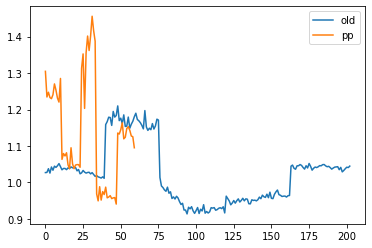

In [76]:
x1 = pd.DataFrame(baseline_dataset[baseline_dataset['label']=='old_general']).reset_index(drop=True)
x2 = pd.DataFrame(baseline_dataset[baseline_dataset['label']=='old_parkinson']).reset_index(drop=True)
# x3 = pd.DataFrame(entropy_dataset.dispersion_entropy.iloc[10:]).reset_index(drop=True)
x = pd.concat([x1.gait_avg	,x2.gait_avg	],axis=1)
x.columns = ['old','pp']
x.plot()

In [77]:
entropy_dataset = dataset_gait.groupby(['participant_id','group']).apply(generate_entropy).reset_index(drop=True)
entropy_dataset

,participant_id,approximate_entropy,fuzzy_entropy,permutation_entropy,spectral_entropy,dispersion_entropy,increment_entropy,phase_entropy,slope_entropy,label
0,old_1,0.018896,0.002216,0.981941,0.306904,2.059229,3.725481,0.816152,-0.0,old_general
1,old_1,0.018896,0.000934,0.949452,0.305605,1.822457,3.46132,0.563999,-0.0,old_general
2,old_1,0.091859,0.001897,0.981941,0.305357,2.114308,3.614369,0.825595,-0.0,old_general
3,old_1,0.370714,0.008119,0.998001,0.307437,1.864237,3.239098,0.831894,0.297472,old_general
4,old_1,0.018896,0.000611,0.981941,0.30579,1.86788,3.725481,0.816699,-0.0,old_general
...,...,...,...,...,...,...,...,...,...,...
446,young_5,-0.054067,0.000717,0.998001,0.307542,1.809158,3.19716,0.694718,-0.0,young_general
447,young_5,0.018896,0.001571,0.998001,0.304924,1.809158,3.794653,0.829867,-0.0,young_general
448,young_5,0.230518,0.001554,0.981941,0.30574,1.731026,3.086049,0.877997,-0.0,young_general
449,young_5,0.018896,0.001616,0.998001,0.305419,1.86788,3.725481,0.89178,-0.0,young_general


In [78]:
entropy_dataset = entropy_dataset.drop(entropy_dataset.index[40:60])
entropy_dataset

,participant_id,approximate_entropy,fuzzy_entropy,permutation_entropy,spectral_entropy,dispersion_entropy,increment_entropy,phase_entropy,slope_entropy,label
0,old_1,0.018896,0.002216,0.981941,0.306904,2.059229,3.725481,0.816152,-0.0,old_general
1,old_1,0.018896,0.000934,0.949452,0.305605,1.822457,3.46132,0.563999,-0.0,old_general
2,old_1,0.091859,0.001897,0.981941,0.305357,2.114308,3.614369,0.825595,-0.0,old_general
3,old_1,0.370714,0.008119,0.998001,0.307437,1.864237,3.239098,0.831894,0.297472,old_general
4,old_1,0.018896,0.000611,0.981941,0.30579,1.86788,3.725481,0.816699,-0.0,old_general
...,...,...,...,...,...,...,...,...,...,...
446,young_5,-0.054067,0.000717,0.998001,0.307542,1.809158,3.19716,0.694718,-0.0,young_general
447,young_5,0.018896,0.001571,0.998001,0.304924,1.809158,3.794653,0.829867,-0.0,young_general
448,young_5,0.230518,0.001554,0.981941,0.30574,1.731026,3.086049,0.877997,-0.0,young_general
449,young_5,0.018896,0.001616,0.998001,0.305419,1.86788,3.725481,0.89178,-0.0,young_general


In [79]:
baseline_dataset.to_csv('gait_baseline_dataset_timewindow_20.csv')
entropy_dataset.to_csv('gait_entropy_dataset_timewindow_20.csv')

<AxesSubplot:>

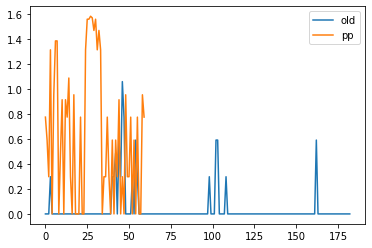

In [80]:
x1 = pd.DataFrame(entropy_dataset[entropy_dataset['label']=='old_general']).reset_index(drop=True)
x2 = pd.DataFrame(entropy_dataset[entropy_dataset['label']=='old_parkinson']).reset_index(drop=True)
# x3 = pd.DataFrame(entropy_dataset.dispersion_entropy.iloc[10:]).reset_index(drop=True)
x = pd.concat([x1.slope_entropy	,x2.slope_entropy	],axis=1)
x.columns = ['old','pp']
x.plot()